Resuelve la ecuación del oscilador armónico $y'' + \omega^{2} y = 0$, convirtiéndola en el sistema de dos ecuaciones diferenciales
 
 $$y' = u,$$
 $$u' = -\omega^{2}y,$$

con condiciones iniciales $y(0) = 1$ y $u(0) = 0$, mediante el método de Euler.


In [1]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt

In [2]:
def f(t, y, w2):
    func = np.array([y[1], -w2*y[0]])
    return func

In [3]:
def jac(t, y, w2):
    
    J = np.array([[0.,1.],
                 [-w2, 0.]])
    
    return J

In [4]:
w2 = 10.
y0 = np.array([1.,0.])
t0 = 0.

t1 = 10.
dt = 0.01

nt = t1/dt -1

In [5]:
r = ode(f, jac).set_integrator('dop853', method='bdf')
r.set_initial_value(y0, t0).set_f_params(w2).set_jac_params(w2)

In [6]:
sol = []
while r.successful() and r.t < t1:
    sol.append(r.integrate(r.t+dt))
    
solnp = np.array(sol)

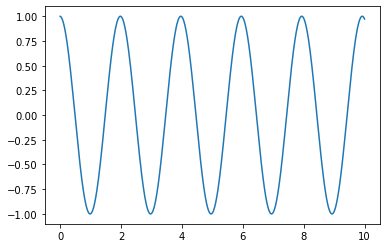

In [7]:
plt.plot(np.linspace(0,t1, 1001),solnp[:,0])

Comparar con la solución de Euler:
![Gráfica](grafica.png)